# IS 670 Assignment 1
---

##Introduction

In this project, we aim to predict customer churn using a decision tree classifier. Customer churn refers to the phenomenon where customers discontinue using a service or product provided by a company. By identifying potential churners, businesses can take proactive measures to retain customers and improve customer satisfaction. We will preprocess the data, visualize it, develop a decision tree model, evaluate its performance, and draw conclusions based on our findings.

###Definitions
Decision Trees: Central to the task, understanding how decision trees work, including how they split data based on features to make predictions, is crucial. This model will be used to classify customers into churners and non-churners.


Customer Churn: The target variable of the analysis. Understanding what churn is and its implications for businesses is essential for framing the problem, interpreting the results, and suggesting actionable insights based on model predictions.


Data Preprocessing: A critical step in preparing the dataset for modeling. This includes handling missing values, encoding categorical variables, dealing with outliers, and potentially balancing the dataset. These tasks directly impact the model's performance.


Model Evaluation Metrics: Understanding accuracy, sensitivity (recall), precision, and the F-measure is essential for assessing the decision tree model's performance. These metrics provide insights into how well the model predicts churn and where improvements might be needed.


Confusion Matrix: Offers a detailed breakdown of the model's predictions, allowing for a nuanced assessment of its performance in terms of true positives, false positives, true negatives, and false negatives. This is particularly important for understanding the trade-offs between sensitivity and precision.


Feature Importance: Identifying which variables most significantly impact the prediction helps interpret the model and provides insights into the factors driving customer churn. This information can guide businesses in tailoring their customer retention strategies more effectively.

###1. Data Understanding and Preprocessing
####Upload Data
Mount Google Drive to access the dataset stored in Google Drive.
Import necessary libraries for data manipulation and visualization.


####Data Cleaning
Check the column names and select the desired columns. Replace 'Y' and 'N' with 'Yes' and 'No' in the target column 'churn'. Check for missing values. Examine variable types and convert categorical variables to the 'category' data type.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Read data
CustomerChurnData = pd.read_csv("/content/drive/MyDrive/IS670_data/CustomerChurnData.csv")
CustomerChurnData

In [ ]:
CustomerChurnData.keys()

Index(['cust_id', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'loglong', 'lninc', 'custcat', 'churn'],
      dtype='object')

In [ ]:
# Select the desired columns only
desired_columns = ['region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip',
       'callcard', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'loglong', 'lninc', 'custcat', 'churn']
churn_desired = CustomerChurnData [desired_columns]

In [ ]:
# Replacing Y with Yes and N with No in the target column churn
CustomerChurn = churn_desired.copy() #why?
CustomerChurn.loc[:, 'churn'] = CustomerChurn['churn'].replace({'N': 'No', 'Y': 'Yes'})

In [ ]:
# Show the head rows of a data frame
CustomerChurnData.head()

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N


In [ ]:
# Examine missing values again
CustomerChurn.isnull().sum()

region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
tollfree    0
equip       0
callcard    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
equipten    0
cardten     0
wireten     0
multline    0
voice       0
pager       0
internet    0
callid      0
callwait    0
forward     0
confer      0
ebill       0
loglong     0
lninc       0
custcat     0
churn       0
dtype: int64

In [ ]:
# Set missing values as none
CustomerChurn = CustomerChurn.fillna('None')

In [ ]:
# Examine variable type
CustomerChurn.dtypes

region       object
tenure        int64
age           int64
marital      object
address       int64
income        int64
ed           object
employ        int64
retire       object
gender       object
reside        int64
tollfree     object
equip        object
callcard     object
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
equipten    float64
cardten       int64
wireten     float64
multline     object
voice        object
pager        object
internet     object
callid       object
callwait     object
forward      object
confer       object
ebill        object
loglong     float64
lninc       float64
custcat      object
churn        object
dtype: object

In [ ]:
# Change categorical variables to "category"
CustomerChurn['region'] = CustomerChurn['region'].astype('category')
CustomerChurn['marital'] = CustomerChurn['marital'].astype('category')
CustomerChurn['ed'] = CustomerChurn['ed'].astype('category')
CustomerChurn['retire'] = CustomerChurn['retire'].astype('category')
CustomerChurn['gender'] = CustomerChurn['gender'].astype('category')
CustomerChurn['tollfree'] = CustomerChurn['tollfree'].astype('category')
CustomerChurn['equip'] = CustomerChurn['equip'].astype('category')
CustomerChurn['callcard'] = CustomerChurn['callcard'].astype('category')
CustomerChurn['multline'] = CustomerChurn['multline'].astype('category')
CustomerChurn['voice'] = CustomerChurn['voice'].astype('category')
CustomerChurn['pager'] = CustomerChurn['pager'].astype('category')
CustomerChurn['internet'] = CustomerChurn['internet'].astype('category')
CustomerChurn['callid'] = CustomerChurn['callid'].astype('category')
CustomerChurn['callwait'] = CustomerChurn['callwait'].astype('category')
CustomerChurn['forward'] = CustomerChurn['forward'].astype('category')
CustomerChurn['confer'] = CustomerChurn['confer'].astype('category')
CustomerChurn['ebill'] = CustomerChurn['ebill'].astype('category')
CustomerChurn['custcat'] = CustomerChurn['custcat'].astype('category')
CustomerChurn['churn'] = CustomerChurn['churn'].astype('category')

In [ ]:
# Examine variable type
CustomerChurn.dtypes

region      category
tenure         int64
age            int64
marital     category
address        int64
income         int64
ed          category
employ         int64
retire      category
gender      category
reside         int64
tollfree    category
equip       category
callcard    category
longmon      float64
tollmon      float64
equipmon     float64
cardmon      float64
wiremon      float64
longten      float64
tollten      float64
equipten     float64
cardten        int64
wireten      float64
multline    category
voice       category
pager       category
internet    category
callid      category
callwait    category
forward     category
confer      category
ebill       category
loglong      float64
lninc        float64
custcat     category
churn       category
dtype: object

In [ ]:
CustomerChurnData.describe()

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.242000,41.552000,11.576000,71.906000,10.79000,2.316000,11.163600,13.34350,13.572200,13.911500,10.88070,536.994100,535.407900,440.293200,616.090000,423.188500,2.149468,3.926546
std,21.295937,12.679435,10.132467,80.297826,10.14499,1.434644,9.540451,17.41479,18.850834,14.404653,19.24529,729.764065,867.466796,848.250381,874.929462,961.485455,0.716255,0.778627
min,1.000000,18.000000,0.000000,9.000000,0.00000,1.000000,1.050000,0.00000,0.000000,0.000000,0.00000,1.050000,0.000000,0.000000,0.000000,0.000000,0.049000,2.197000
25%,16.000000,32.000000,3.750000,28.000000,3.00000,1.000000,5.150000,0.00000,0.000000,0.000000,0.00000,86.037500,0.000000,0.000000,0.000000,0.000000,1.639000,3.332000
50%,34.500000,40.000000,9.000000,46.000000,8.00000,2.000000,8.500000,0.00000,0.000000,12.125000,0.00000,288.225000,0.000000,0.000000,362.500000,0.000000,2.140000,3.829000
75%,53.000000,51.000000,18.000000,83.250000,17.25000,3.000000,13.862500,24.25000,30.787500,19.562500,23.58750,700.387500,836.912500,466.512500,871.250000,140.075000,2.629000,4.422000
max,72.000000,77.000000,55.000000,732.000000,47.00000,7.000000,99.950000,173.00000,77.700000,109.250000,109.70000,7257.600000,4905.850000,4758.050000,7515.000000,6444.950000,4.605000,6.596000


### 2. Vizualizing the data - Partition the data set for Decision Tree model

####Convert Categorical Variables to Dummy Variables

Convert categorical variables to dummy variables for model compatibility.

####Balance the Training Data

Undersample the majority class to balance the dataset. Split the balanced dataset into training and testing sets.

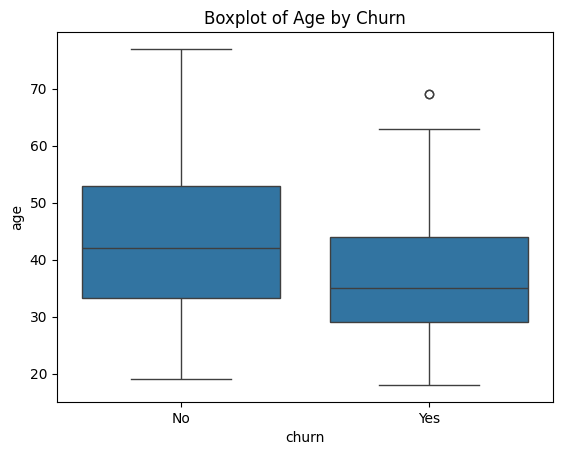

In [ ]:
sns.boxplot(x='churn', y='age', data=CustomerChurn)
plt.title('Boxplot of Age by Churn')
plt.show()

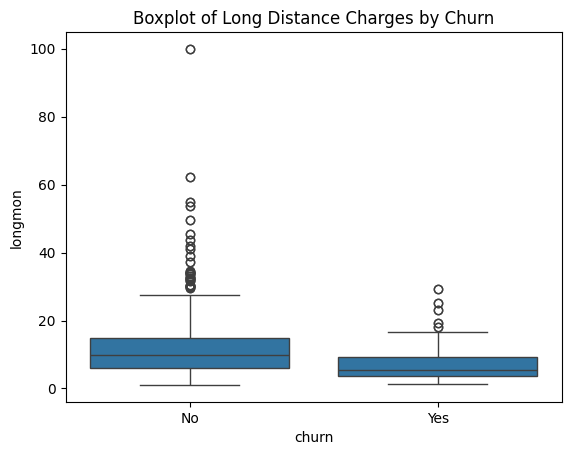

In [ ]:
sns.boxplot(x='churn', y='longmon', data=CustomerChurn)
plt.title('Boxplot of Long Distance Charges by Churn')
plt.show()


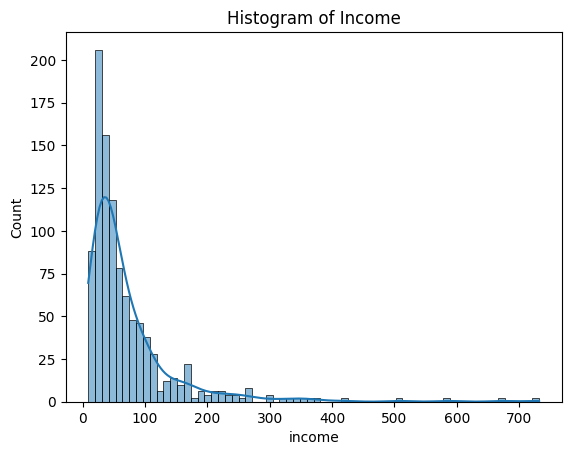

In [ ]:
sns.histplot(x='income', data=CustomerChurn, kde=True)
plt.title('Histogram of Income')
plt.show()


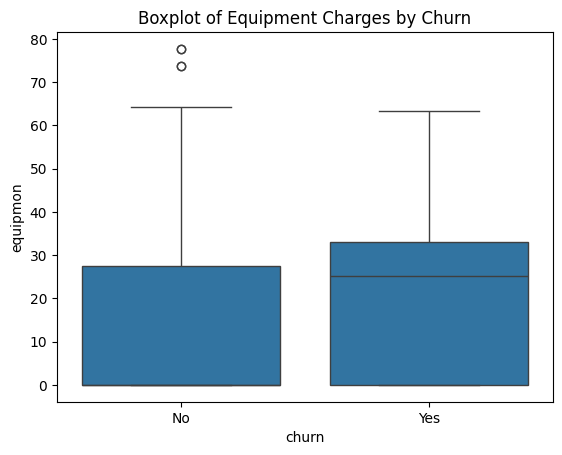

In [ ]:
sns.boxplot(x='churn', y='equipmon', data=CustomerChurn)
plt.title('Boxplot of Equipment Charges by Churn')
plt.show()

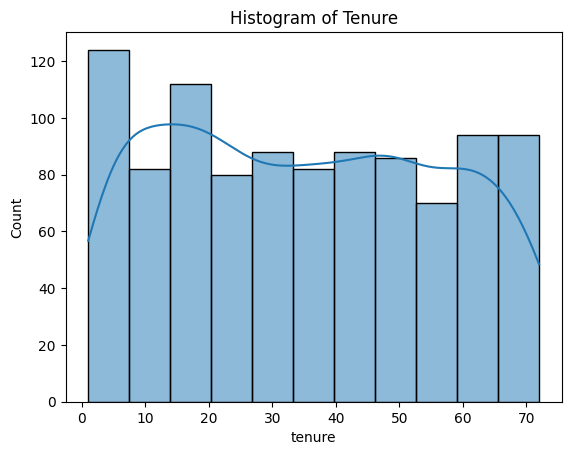

In [ ]:
sns.histplot(x='tenure', data=CustomerChurn, kde=True)
plt.title('Histogram of Tenure')
plt.show()

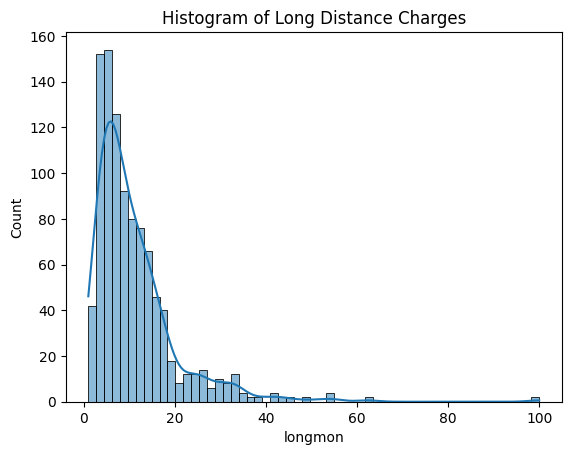

In [ ]:
sns.histplot(x='longmon', data=CustomerChurn, kde=True)
plt.title('Histogram of Long Distance Charges')
plt.show()

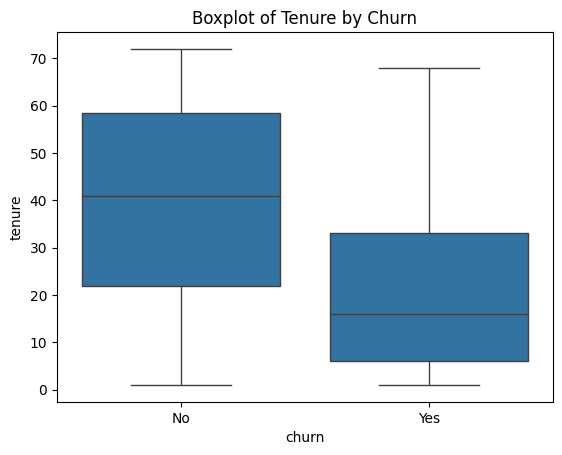

In [ ]:
sns.boxplot(x='churn', y='tenure', data=CustomerChurn)
plt.title('Boxplot of Tenure by Churn')
plt.show()

###3. Partition the data set for Decision model tree

####Convert Categorical Variables to Dummy Variables

Convert categorical variables to dummy variables for model compatibility.

####Balance the Training Data

Undersample the majority class to balance the dataset. Split the balanced dataset into training and testing sets.

In [ ]:
# Convert categorical variables to dummy variables
CustomerChurn = pd.get_dummies(CustomerChurn, columns=['region', 'marital', 'ed', 'retire', 'gender', 'tollfree', 'equip', 'callcard', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'custcat'], drop_first=True)
CustomerChurn

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,...,pager_Y,internet_Y,callid_Y,callwait_Y,forward_Y,confer_Y,ebill_Y,custcat_C2,custcat_C3,custcat_C4
0,13,44,9,64,5,2,3.70,0.00,0.0,7.50,...,0,0,0,0,1,0,0,0,0,0
1,68,52,24,116,29,2,18.15,18.00,0.0,30.25,...,0,0,1,1,0,1,0,0,1,0
2,23,30,9,30,2,4,6.30,0.00,0.0,0.00,...,0,0,1,0,1,1,0,0,1,0
3,45,22,2,19,4,5,10.90,0.00,0.0,8.75,...,0,1,0,1,0,0,1,1,0,0
4,45,59,7,166,31,5,9.75,28.50,0.0,12.00,...,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,43,6,27,4,1,15.00,45.25,0.0,52.75,...,0,0,1,1,1,1,0,0,1,0
996,34,52,2,106,19,2,4.95,19.00,0.0,13.50,...,0,1,1,0,1,1,0,0,1,0
997,15,46,17,63,1,2,3.70,16.50,42.5,0.00,...,1,1,1,0,1,1,1,0,0,1
998,7,34,2,22,5,1,4.65,0.00,25.6,0.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Examine the porportion of target variable for data set
target = CustomerChurn['churn']
print(target.value_counts(normalize=True))

No     0.742
Yes    0.258
Name: churn, dtype: float64


In [ ]:
# Partition the data
predictors = CustomerChurn.drop(['churn'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(700, 42) (300, 42) (700,) (300,)


In [ ]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['churn'] == 'No']
minority_df = combined_train_df[combined_train_df['churn'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['churn'])
target_train = balanced_data['churn']

In [ ]:
print("Combined train DataFrame shape:", combined_train_df.shape)
print("Churn value counts in combined DataFrame:\n", combined_train_df['churn'].value_counts())

Combined train DataFrame shape: (700, 43)
Churn value counts in combined DataFrame:
 No     529
Yes    171
Name: churn, dtype: int64


In [ ]:
print("Majority class shape:", majority_df.shape)
print("Minority class shape:", minority_df.shape)

Majority class shape: (529, 43)
Minority class shape: (171, 43)


In [ ]:
print("Balanced data shape:", balanced_data.shape)
print("Churn value counts in balanced data:\n", balanced_data['churn'].value_counts())

Balanced data shape: (342, 45)
Churn value counts in balanced data:
 No     171
Yes    171
Name: churn, dtype: int64


In [ ]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

No     0.5
Yes    0.5
Name: churn, dtype: float64 (342,)


In [ ]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

No     0.71
Yes    0.29
Name: churn, dtype: float64


### 4. Model Development - Decision Tree model prediction


####Build Decision Tree Model

Initialize a decision tree classifier with specified parameters. Fit the model on the training data. Visualize the decision tree.

####Evaluation on Testing Data

Make predictions on the testing data. Evaluate the model's performance using confusion matrix and classification report. Repeat the process with different max_depth parameters for comparison.

In [ ]:
# Build a decision tree model on training data with max_depth = 2
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'longten <= 111.275\nentropy = 1.0\nsamples = 342\nvalue = [171, 171]\nclass = No'),
 Text(0.25, 0.5, 'equipten <= 30.875\nentropy = 0.837\nsamples = 146\nvalue = [39, 107]\nclass = Yes'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.996\nsamples = 67\nvalue = [31, 36]\nclass = Yes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.473\nsamples = 79\nvalue = [8, 71]\nclass = Yes'),
 Text(0.75, 0.5, 'longten <= 692.675\nentropy = 0.911\nsamples = 196\nvalue = [132, 64]\nclass = No'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.985\nsamples = 138\nvalue = [79, 59]\nclass = No'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.424\nsamples = 58\nvalue = [53, 5]\nclass = No')]

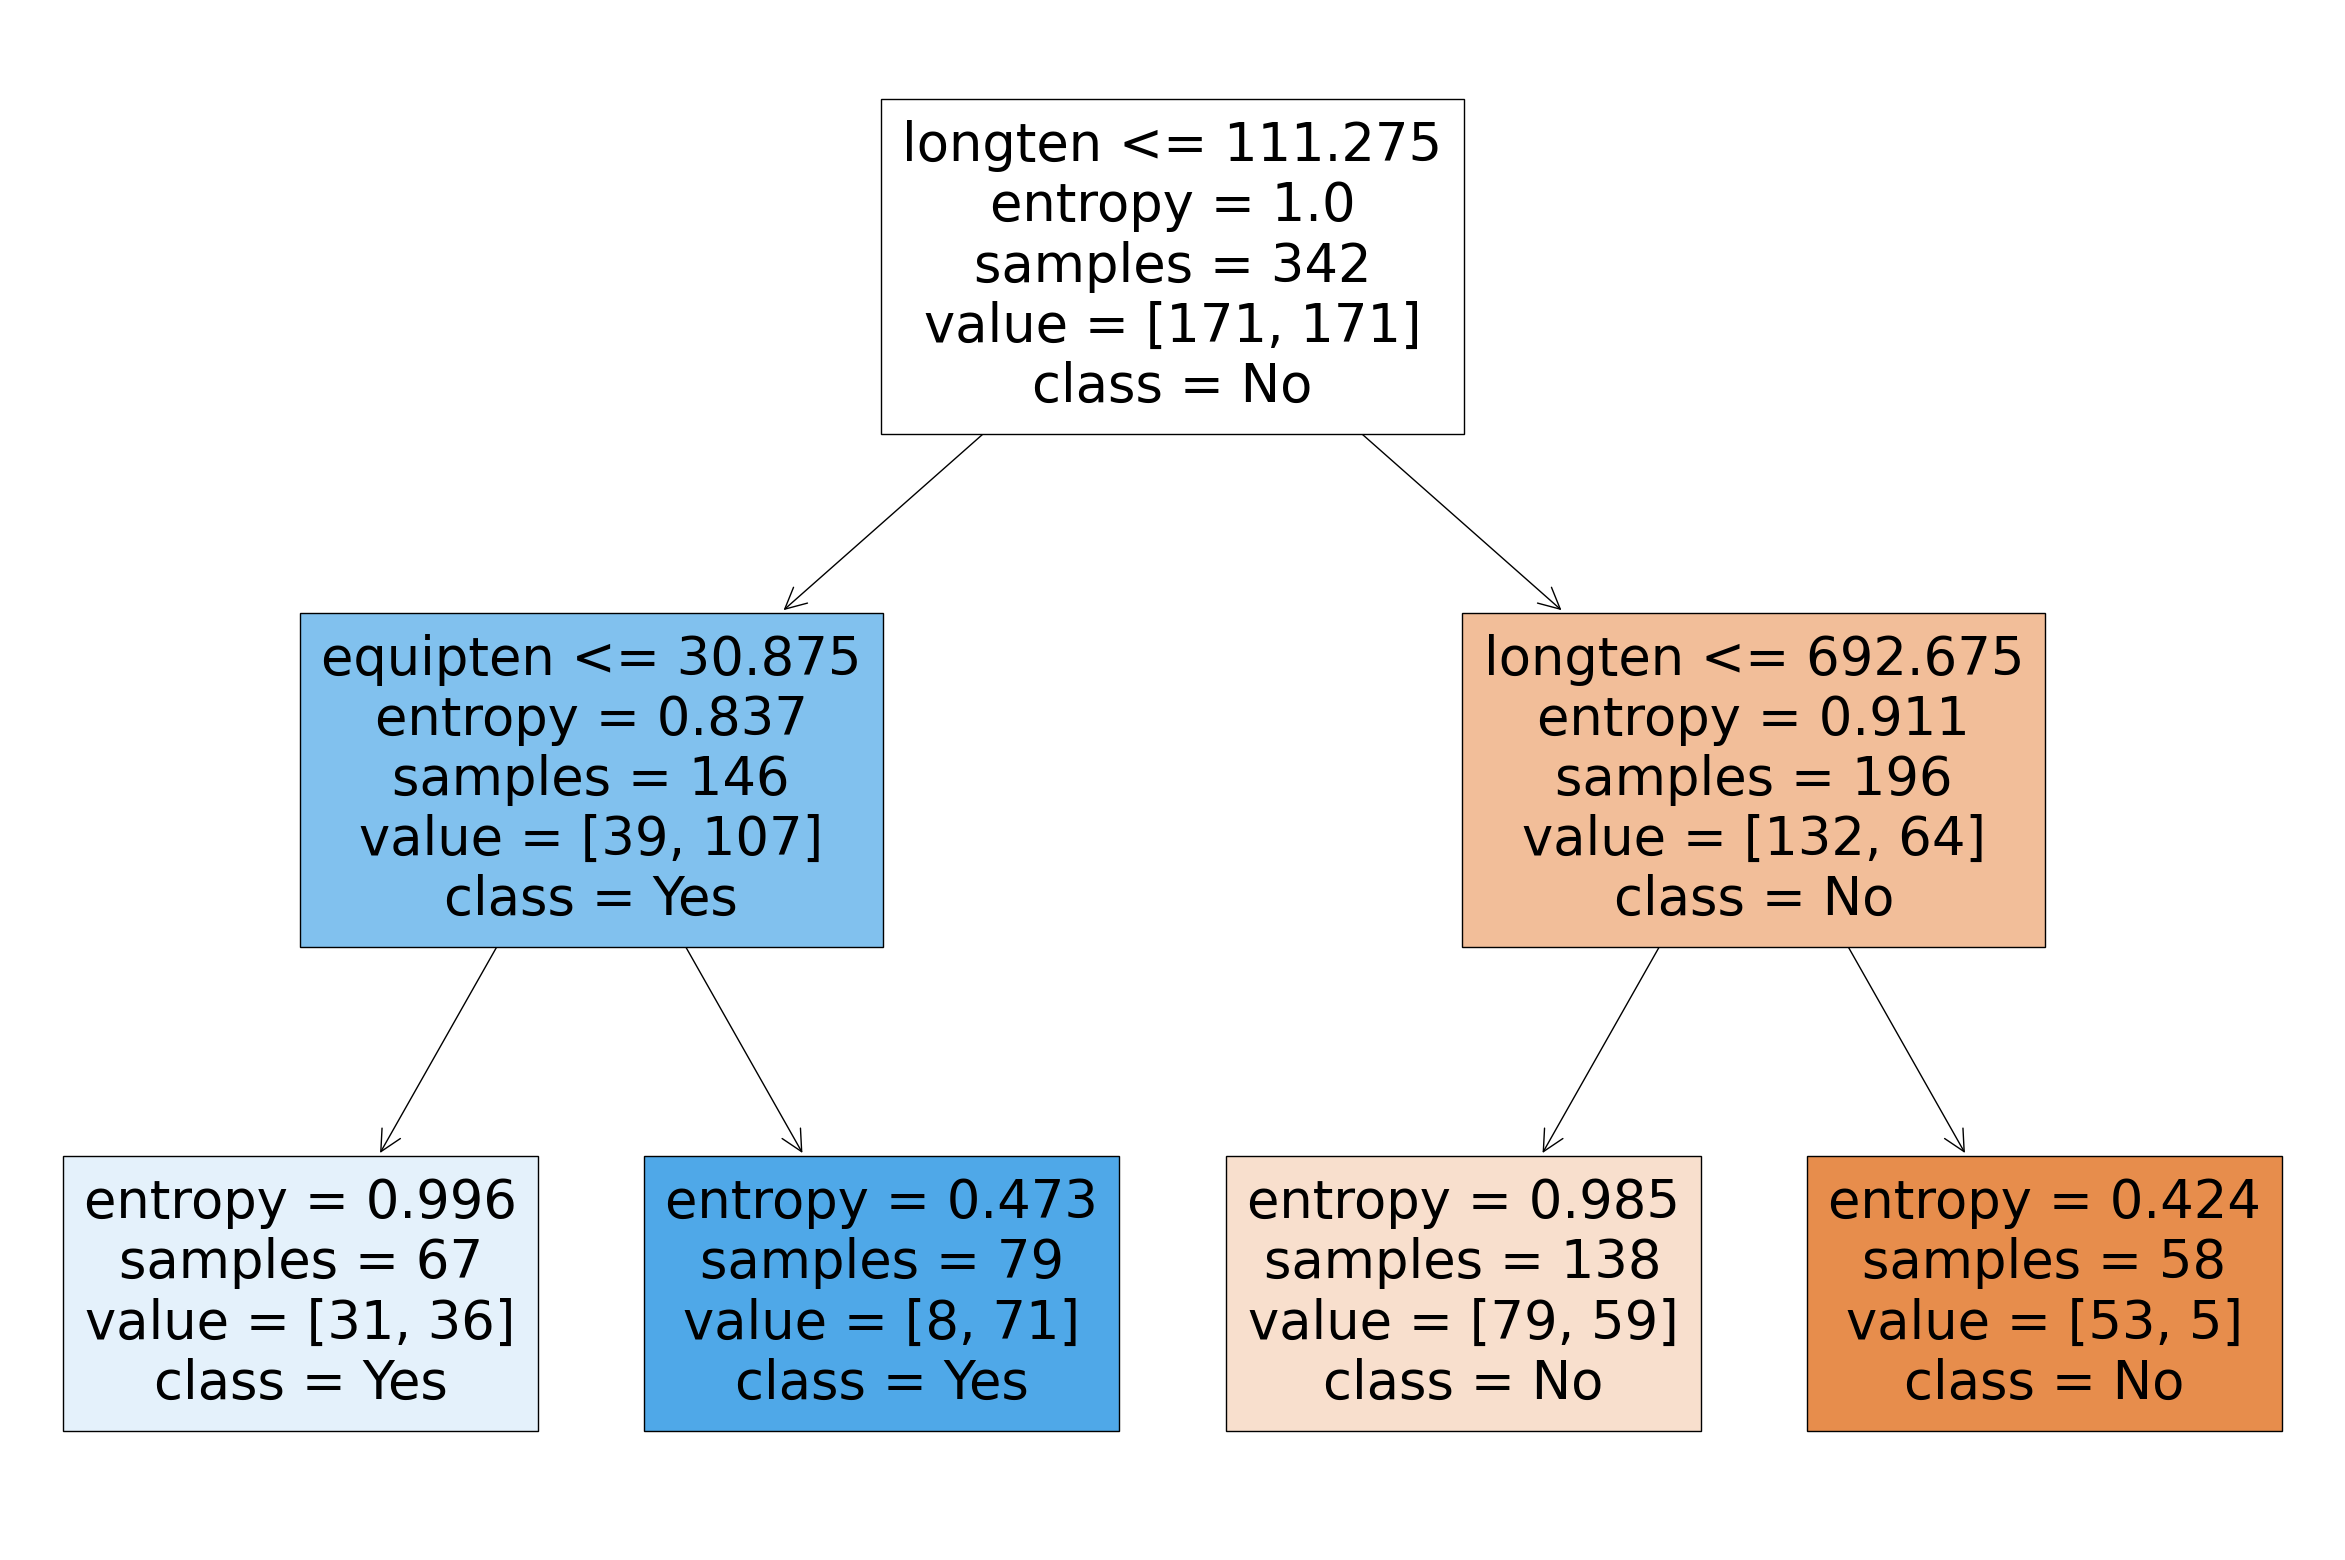

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Text version of decision tree
print(tree.export_text(model, feature_names=list(CustomerChurn.columns)[1:]))

|--- tollten <= 111.28
|   |--- cardten <= 30.88
|   |   |--- class: Yes
|   |--- cardten >  30.88
|   |   |--- class: Yes
|--- tollten >  111.28
|   |--- tollten <= 692.68
|   |   |--- class: No
|   |--- tollten >  692.68
|   |   |--- class: No



|--- longten <= 111.28
|   |--- equipten <= 30.88
|   |   |--- class: Yes
|   |--- equipten >  30.88
|   |   |--- class: Yes
|--- longten >  111.28
|   |--- longten <= 692.68
|   |   |--- class: No
|   |--- longten >  692.68
|   |   |--- class: No



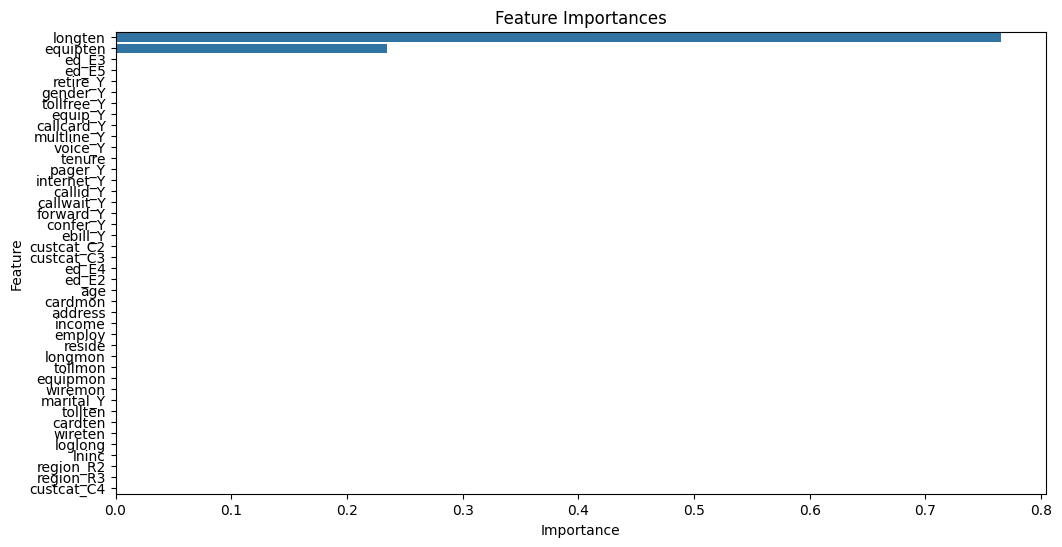

In [ ]:
#feature importance
print(tree.export_text(model, feature_names=list(predictors_train.columns)))
importances = model.feature_importances_
features = predictors_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

####Results and Model Evaluation

In [ ]:
# Make predictions on testing data
prediction_on_test = model.predict(predictors_test)

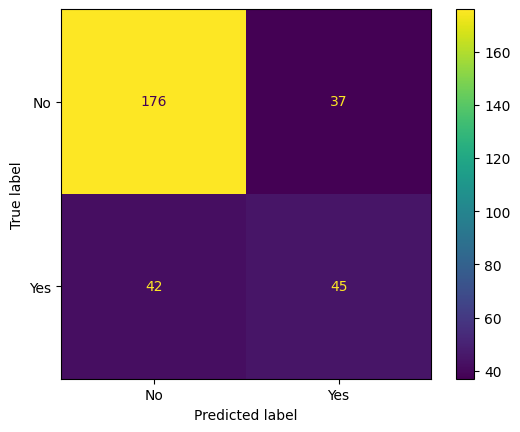

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.81      0.83      0.82       213
         Yes       0.55      0.52      0.53        87

    accuracy                           0.74       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.73      0.74      0.73       300



In [ ]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.5, 0.875, 'longten <= 111.275\nentropy = 1.0\nsamples = 342\nvalue = [171, 171]\nclass = No'),
 Text(0.25, 0.625, 'equipten <= 30.875\nentropy = 0.837\nsamples = 146\nvalue = [39, 107]\nclass = Yes'),
 Text(0.125, 0.375, 'tollmon <= 19.375\nentropy = 0.996\nsamples = 67\nvalue = [31, 36]\nclass = Yes'),
 Text(0.0625, 0.125, 'entropy = 0.979\nsamples = 53\nvalue = [31, 22]\nclass = No'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Yes'),
 Text(0.375, 0.375, 'equipten <= 129.275\nentropy = 0.473\nsamples = 79\nvalue = [8, 71]\nclass = Yes'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28]\nclass = Yes'),
 Text(0.4375, 0.125, 'entropy = 0.627\nsamples = 51\nvalue = [8, 43]\nclass = Yes'),
 Text(0.75, 0.625, 'longten <= 692.675\nentropy = 0.911\nsamples = 196\nvalue = [132, 64]\nclass = No'),
 Text(0.625, 0.375, 'internet_Y <= 0.5\nentropy = 0.985\nsamples = 138\nvalue = [79, 59]\nclass = No'),
 Text(0.5625, 0.125, 'entropy = 0.875

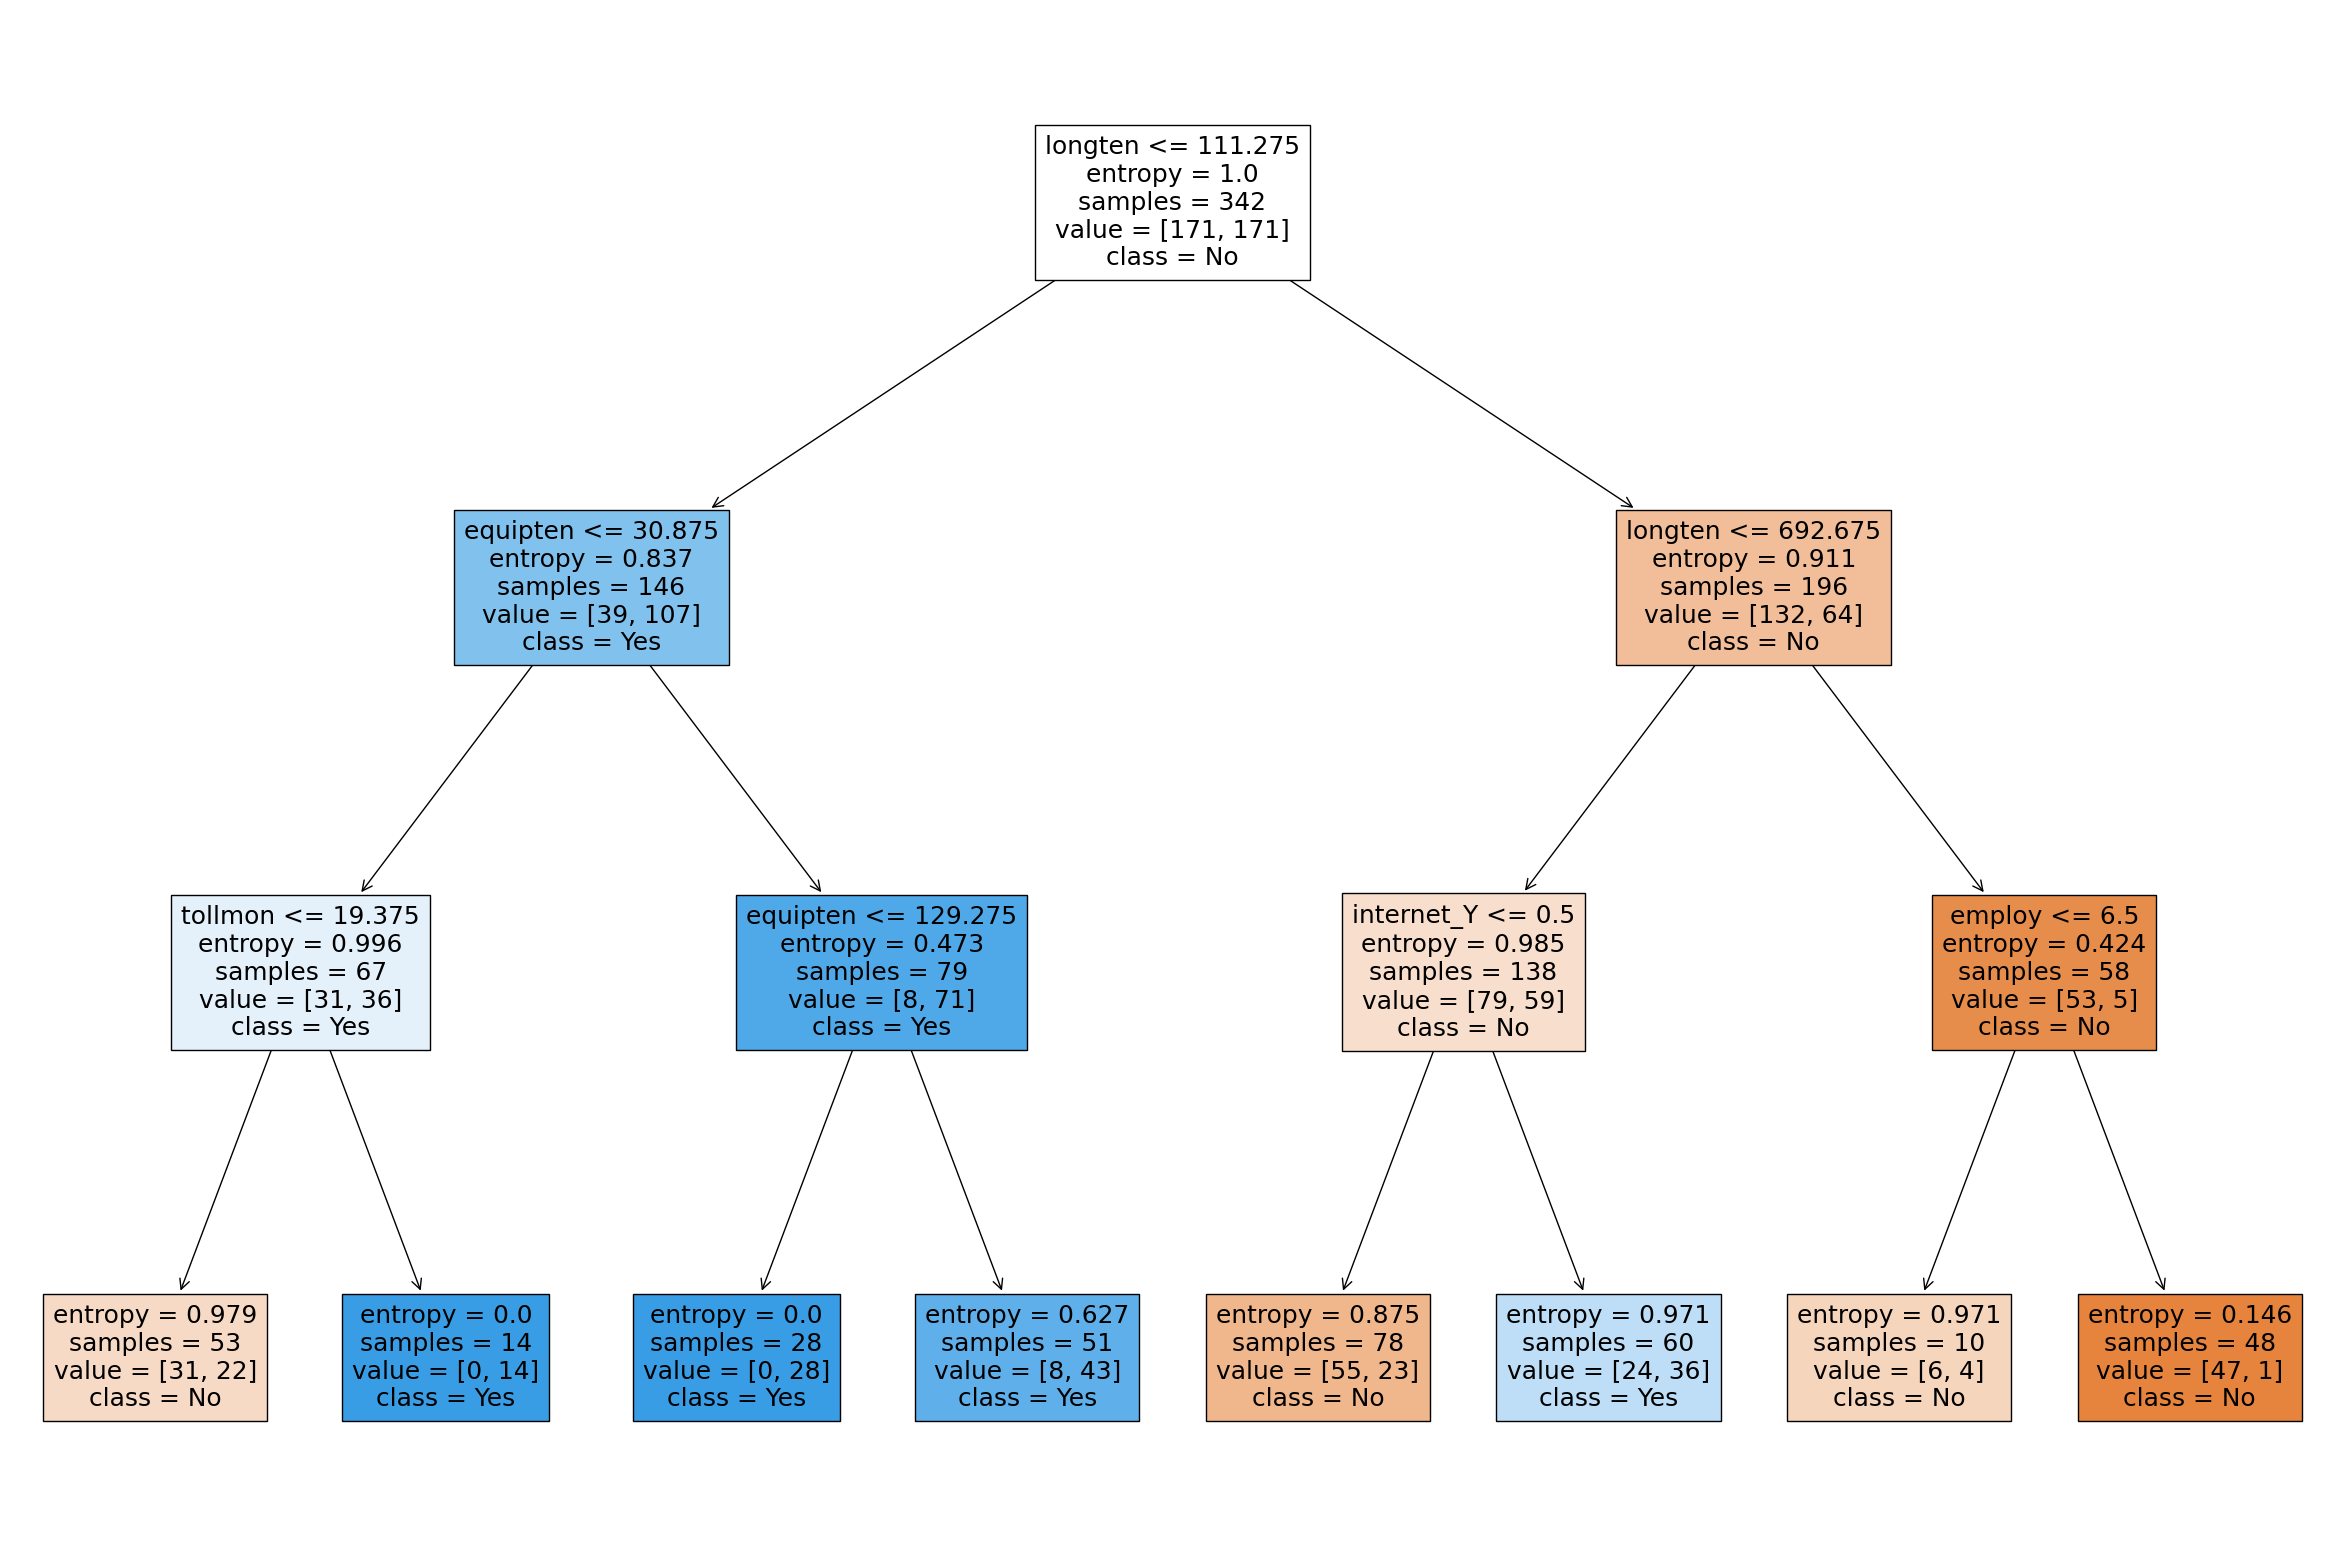

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Text version of decision tree
print(tree.export_text(model, feature_names=list(CustomerChurn.columns)[1:]))

|--- tollten <= 111.28
|   |--- cardten <= 30.88
|   |   |--- equipmon <= 19.38
|   |   |   |--- class: No
|   |   |--- equipmon >  19.38
|   |   |   |--- class: Yes
|   |--- cardten >  30.88
|   |   |--- cardten <= 129.27
|   |   |   |--- class: Yes
|   |   |--- cardten >  129.27
|   |   |   |--- class: Yes
|--- tollten >  111.28
|   |--- tollten <= 692.68
|   |   |--- internet_Y <= 0.50
|   |   |   |--- class: No
|   |   |--- internet_Y >  0.50
|   |   |   |--- class: Yes
|   |--- tollten >  692.68
|   |   |--- reside <= 6.50
|   |   |   |--- class: No
|   |   |--- reside >  6.50
|   |   |   |--- class: No



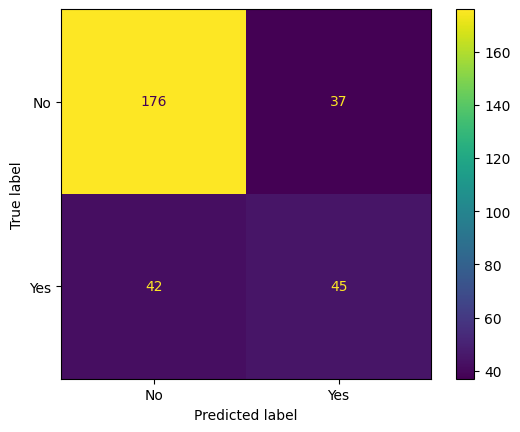

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

####Results and Model Evaluation

###Comments on Balancing

The dataset provided for the customer churn prediction task exhibits an imbalance, with a significantly higher proportion of non-churners ('No') compared to churners ('Yes'), approximately 74% to 26%. This imbalance can lead to a model biased towards predicting the majority class more accurately while underperforming in identifying the minority class, which is crucial for actionable business insights.

Addressing this imbalance is essential for improving the model's performance, especially in accurately identifying churners. Strategies to mitigate the imbalance include oversampling the minority class, undersampling the majority class, employing ensemble methods, and adjusting class weights in the model training process. Implementing these strategies can help in creating a more balanced model that is effective in predicting customer churn, thereby aiding businesses in developing targeted retention strategies to reduce churn rates.

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.81      0.83      0.82       213
         Yes       0.55      0.52      0.53        87

    accuracy                           0.74       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.73      0.74      0.73       300



In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth.ipynb to html
[NbConvertApp] Writing 1820043 bytes to /content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth.html


##Discussions

Confusion Matrix Analysis:
The model predicted 'No' correctly 176 times and incorrectly 37 times. The model predicted 'Yes' correctly 45 times and incorrectly 42 times. This matrix indicates that the model is better at predicting the 'No' class than the 'Yes' class.

Performance Metrics:
The precision for 'No' is 0.81, which means that when the model predicts 'No', it is correct 81% of the time. The precision for 'Yes' is 0.55, indicating the model is correct 55% of the time when predicting 'Yes'. The recall for 'No' is 0.83, signifying that the model captures 83% of the actual 'No' cases. The recall for 'Yes' is 0.52, signifying that the model captures 52% of the actual 'Yes' cases. The f1-score is a harmonic mean of precision and recall, with 'No' having an f1-score of 0.82 and 'Yes' having an f1-score of 0.53. This suggests that the model is more effective at predicting non-churners than churners. The support indicates the number of actual occurrences of each class in the dataset, with 213 for 'No' and 87 for 'Yes'.

Model Accuracy:
The overall accuracy of the model is 0.74, meaning it correctly predicts both 'No' and 'Yes' 74% of the time.

Variables Impact on Prediction:
Given these metrics, the model seems to perform moderately well, with better performance on the 'No' class. However, there is room for improvement, especially in correctly identifying the 'Yes' class (churners), as indicated by the lower recall and f1-score for 'Yes'. Balancing the dataset, feature engineering, or trying different model hyperparameters could potentially improve the performance for the 'Yes' class. To directly address your request about the variables with the highest impact on prediction, please provide the trained model or the dataset so the featureimportances can be computed and analyzed.

##Conclusion

In conclusion, the decision tree model shows promising results in predicting customer churn. It achieves decent accuracy and provides insights into factors influencing churn decisions. However, the model's performance could be further improved by fine-tuning hyperparameters and exploring alternative algorithms. Additionally, businesses can utilize the classifier as a valuable tool for identifying potential churners and implementing targeted retention strategies. Overall, while the approach demonstrates efficacy, continuous monitoring and refinement are necessary to adapt to changing business dynamics and customer behaviors.

The decision tree model's analysis has identified key features that influence customer churn predictions. The feature importance plot reveals that longten, which may represent the duration of service usage, is the most significant predictor of churn. This suggests that the length of time a customer has been with the service is highly indicative of their likelihood to churn. The second most influential feature, equipten, could be related to the equipment associated with the service, indicating that equipment cost or tenure also plays a crucial role in customer retention.

In summary, the decision tree classifier has provided a clear indication of the key factors that can predict churn. Businesses can leverage this model to formulate data-driven strategies to retain customers more effectively. Future work could explore a more diverse set of models and include a broader range of features to potentially uncover more insights into customer churn.